# CLAHE

# Task
Perform contrast enhancement on an image by:
1. Loading an image from a user-specified file.
2. Converting it to grayscale.
3. Applying global histogram equalization.
4. Applying Contrast Limited Adaptive Histogram Equalization (CLAHE) with a clip limit of 3.0 and an 8x8 tile grid.
5. Displaying the original, grayscale, globally equalized, and CLAHE-enhanced images for comparison with appropriate titles.
Finally, summarize the applied contrast enhancement methods and the observed differences in the resulting images.

In [60]:
import cv2
import numpy as np


print("cv2 imported.")

cv2 imported.


In [61]:
image_path = '/content/C.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")
else:
    print("Image loaded successfully. Shape:", original_image.shape)

Image loaded successfully. Shape: (683, 1024, 3)


## Convert to Grayscale



In [62]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
print("Image converted to grayscale. Shape:", gray_image.shape)

Image converted to grayscale. Shape: (683, 1024)


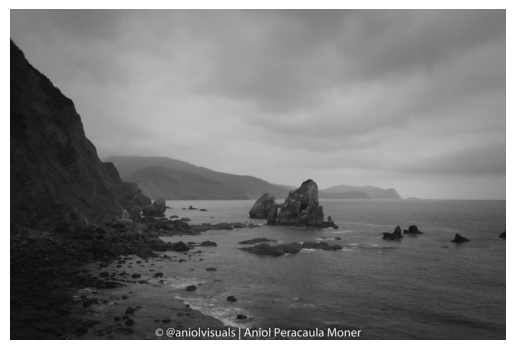

In [63]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

## Apply Global Histogram Equalization

### Subtask:
Apply global histogram equalization to the grayscale image to enhance its contrast.


**Reasoning**:
To apply global histogram equalization, I will use `cv2.equalizeHist()` on the `gray_image` and store the result in `equalized_global_image`, then print a confirmation message.



In [64]:
equalized_global_image = cv2.equalizeHist(gray_image)
print("Global histogram equalization applied. Shape:", equalized_global_image.shape)

Global histogram equalization applied. Shape: (683, 1024)


## Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)

### Subtask:
Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the grayscale image with specified parameters.

**Reasoning**:
To apply CLAHE, I will first create a CLAHE object using `cv2.createCLAHE()` with the specified clip limit (3.0) and tile grid size (8x8). Then, I will apply this CLAHE object to the `gray_image` using the `apply()` method and store the result in `clahe_enhanced_image`, followed by a confirmation message.



In [65]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_enhanced_image = clahe.apply(gray_image)
print("CLAHE applied. Shape:", clahe_enhanced_image.shape)

CLAHE applied. Shape: (683, 1024)


In [66]:
clahe16 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16,16))
clahe_enhanced_image16 = clahe16.apply(gray_image)
print("CLAHE applied. Shape:", clahe_enhanced_image16.shape)

CLAHE applied. Shape: (683, 1024)


In [67]:
clahe7 = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))
clahe_enhanced_image7 = clahe7.apply(gray_image)
print("CLAHE applied. Shape:", clahe_enhanced_image7.shape)

CLAHE applied. Shape: (683, 1024)


## Display Images for Comparison

### Subtask:
Display the original, grayscale, globally equalized, and CLAHE-enhanced images for comparison with appropriate titles.

**Reasoning**:
To display the images, I'll need to import `matplotlib.pyplot` for plotting and visualization.



In [68]:
import matplotlib.pyplot as plt

print("matplotlib.pyplot imported.")

matplotlib.pyplot imported.


**Reasoning**:
Now that `matplotlib.pyplot` is imported, I will create a figure with subplots to display the original, grayscale, globally equalized, and CLAHE-enhanced images for visual comparison. The original image will be converted from BGR to RGB for correct display with matplotlib, and all images will have appropriate titles.



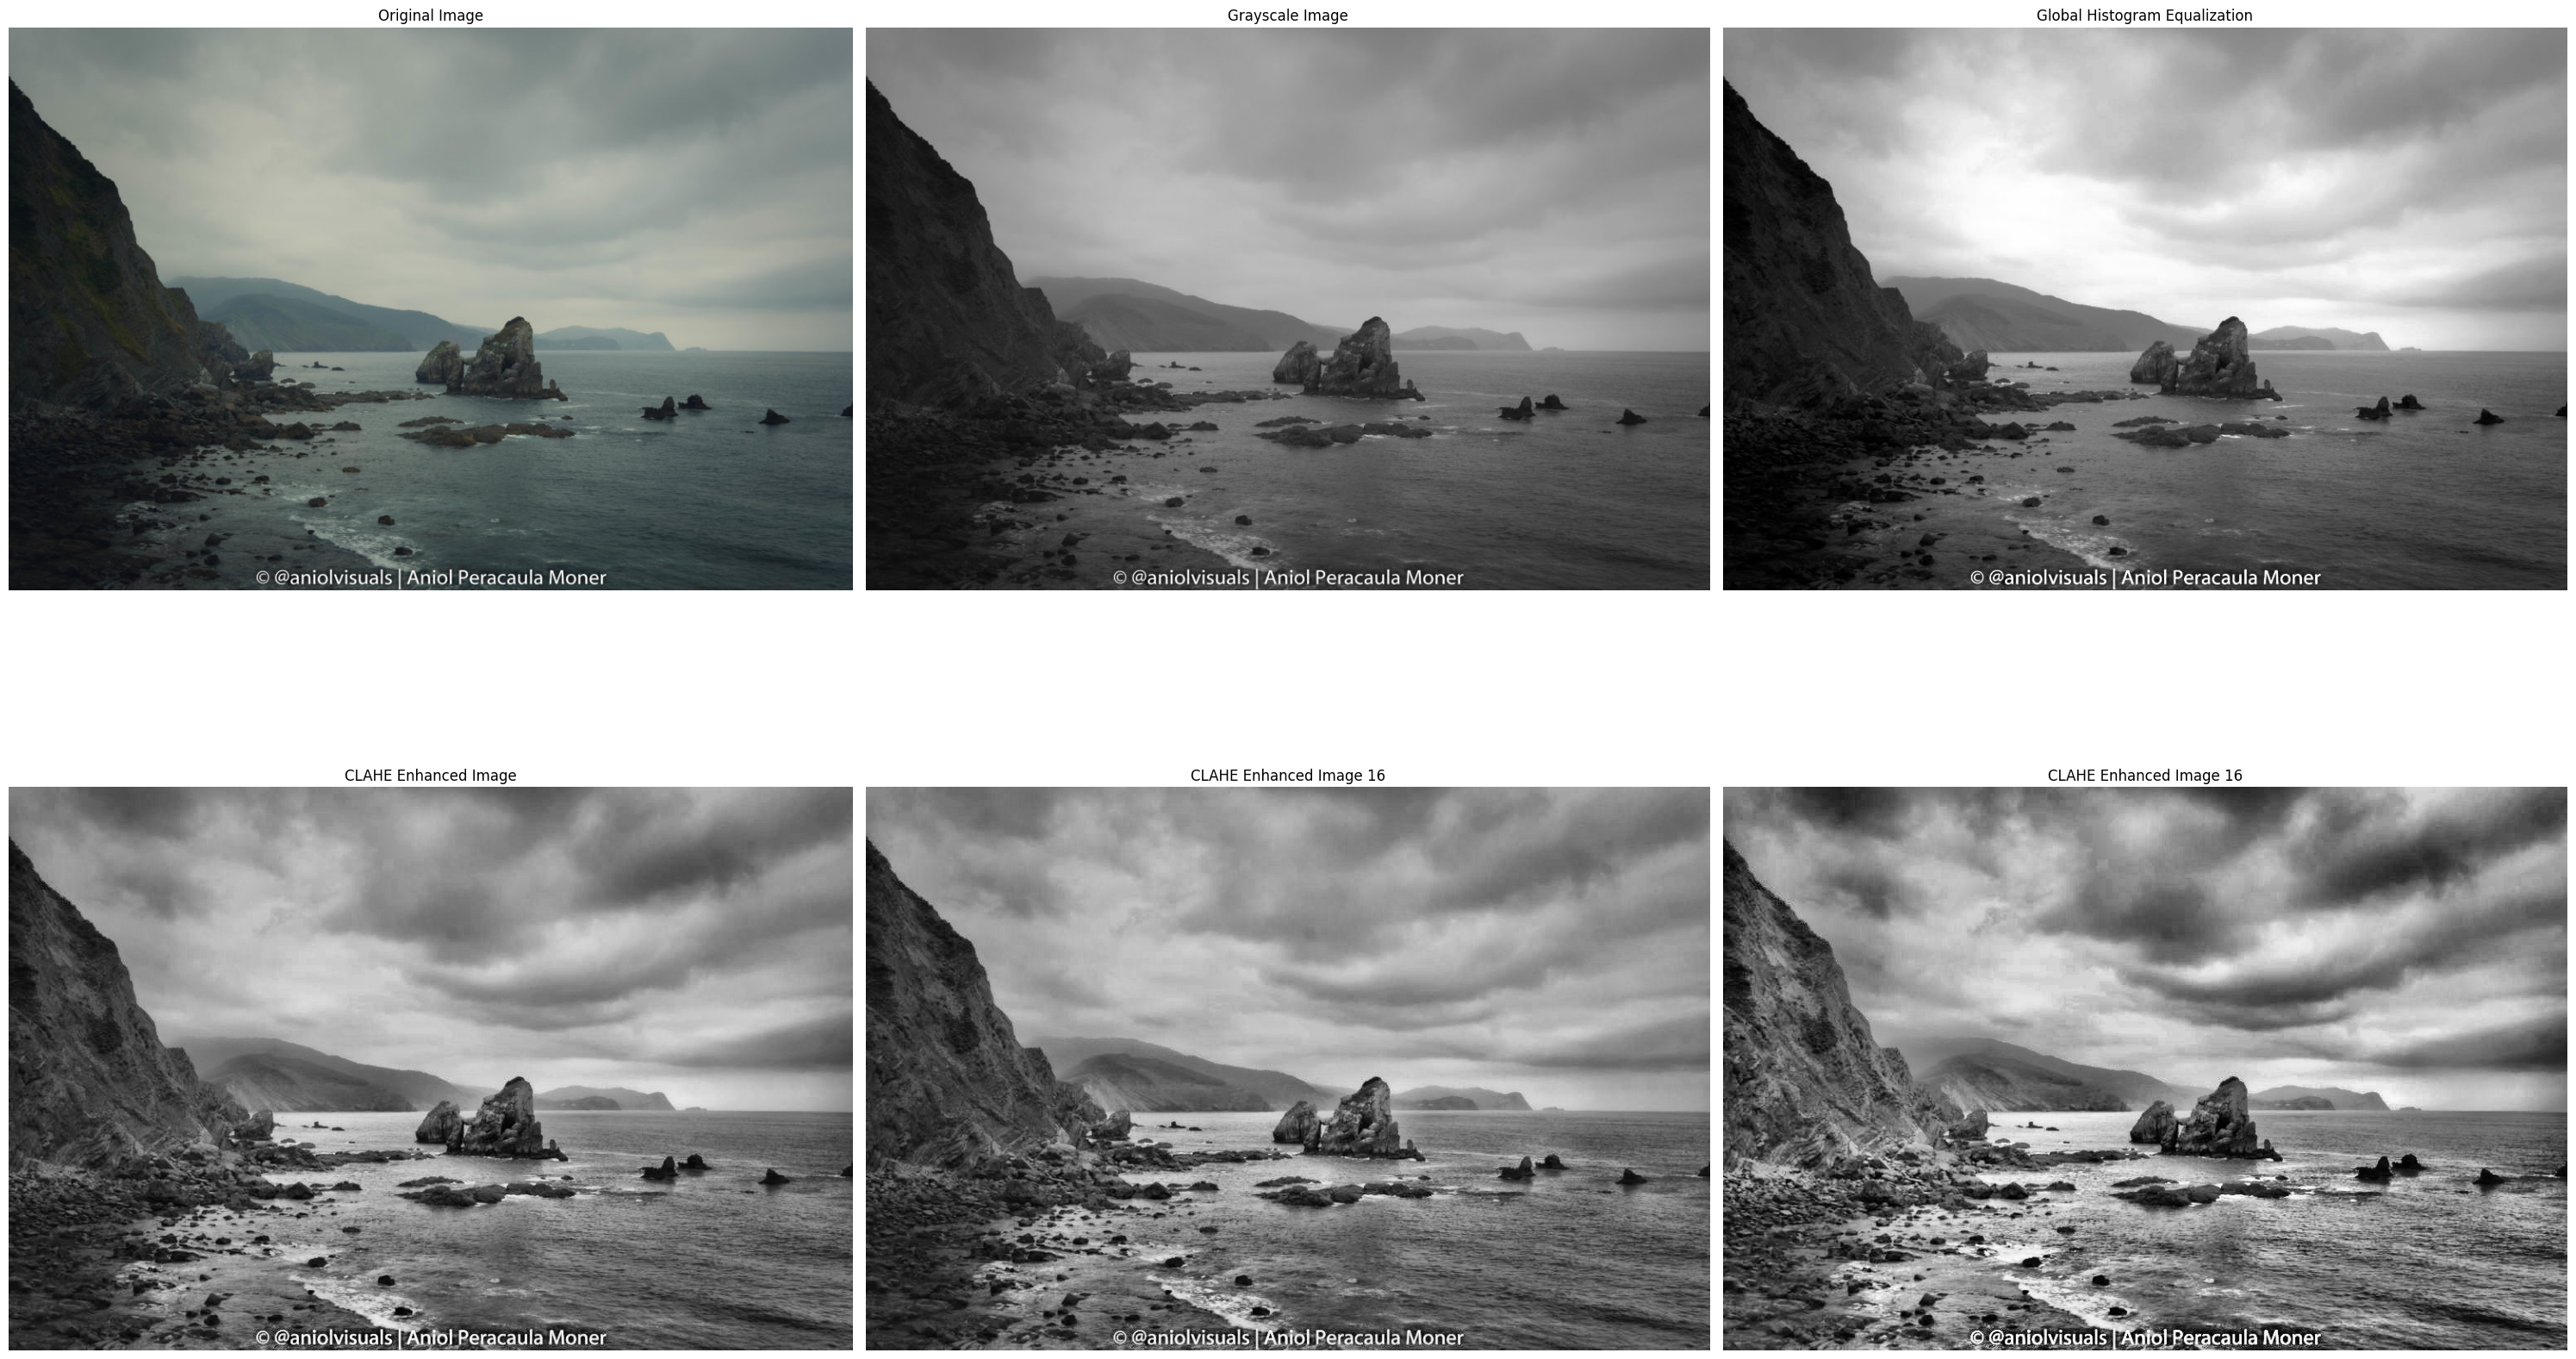

Images displayed for comparison.


In [69]:
plt.figure(figsize=(30, 20))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Global Histogram Equalization')
plt.imshow(equalized_global_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('CLAHE Enhanced Image')
plt.imshow(clahe_enhanced_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('CLAHE Enhanced Image 16')
plt.imshow(clahe_enhanced_image16, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('CLAHE Enhanced Image 16')
plt.imshow(clahe_enhanced_image7, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Images displayed for comparison.")

# CLAHE HSV


In [70]:
# 1. Cargar imagen
imagen = cv2.imread('C.jpg')

# 2. Convertir a HSV
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# 3. Separar los canales
h, s, v = cv2.split(hsv)

# 4. Aplicar CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
v_clahe = clahe.apply(v)

# 5. Unir los canales
hsv_clahe = cv2.merge([h, s, v_clahe])

# 6. Convertir de HSV a BGR para mostrarlo
resultado = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2BGR)

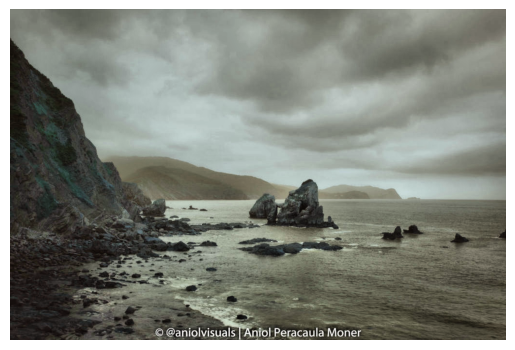

In [71]:
plt.imshow(resultado)
plt.axis('off')
plt.show()

In [72]:
imagen = cv2.imread('C.jpg')  # reemplaza con tu ruta

# 2. Convertir a HSV
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 3. Aplicar CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
v_clahe = clahe.apply(v)

# 4. Crear una LUT (por ejemplo, invertir valores)
lut = np.array([255 - i for i in range(256)], dtype=np.uint8)
v_lut = cv2.LUT(v_clahe, lut)  # Aplicar LUT

# 5. Unir canales y convertir a BGR
hsv_result = cv2.merge([h, s, v_lut])
resultado = cv2.cvtColor(hsv_result, cv2.COLOR_HSV2BGR)

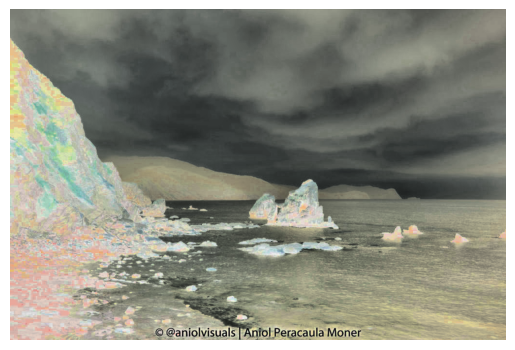

In [73]:
plt.imshow(resultado)
plt.axis('off')
plt.show()

In [74]:
# 2. Convertir a HSV
hsv = cv2.cvtColor(resultado, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 3. Aplicar CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
v_clahe = clahe.apply(v)

# 4. Crear una LUT (por ejemplo, invertir valores)
lut = np.array([255 - i for i in range(256)], dtype=np.uint8)
v_lut = cv2.LUT(v_clahe, lut)  # Aplicar LUT

# 5. Unir canales y convertir a BGR
hsv_result = cv2.merge([h, s, v_lut])
resultado = cv2.cvtColor(hsv_result, cv2.COLOR_HSV2BGR)

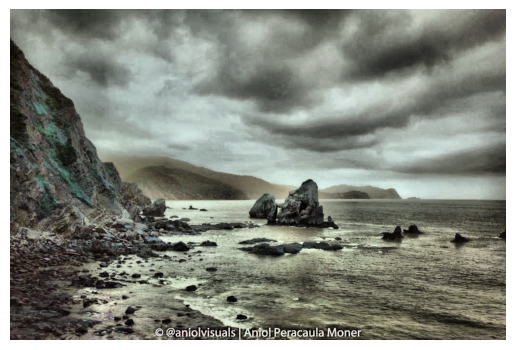

In [75]:
plt.imshow(resultado)
plt.axis('off')
plt.show()

In [76]:
imagen = cv2.imread('H.jpg')  # reemplaza con tu ruta

# 2. Convertir a HSV
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 3. Aplicar CLAHE al canal V
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
v_clahe = clahe.apply(v)

# 4. Crear una LUT (por ejemplo, invertir valores)
lut = np.array([255 - i for i in range(256)], dtype=np.uint8)
v_lut = cv2.LUT(v_clahe, lut)  # Aplicar LUT

# 5. Unir canales y convertir a BGR
hsv_result = cv2.merge([h, s, v_lut])
resultado = cv2.cvtColor(hsv_result, cv2.COLOR_HSV2BGR)

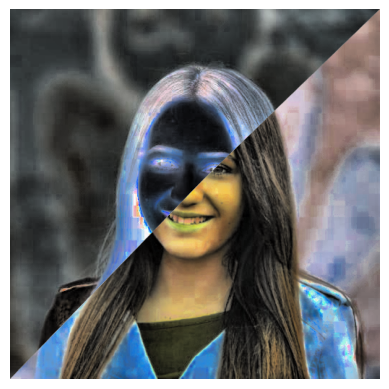

In [77]:
plt.imshow(resultado)
plt.axis('off')
plt.show()